# Análise Bivariada
Inicialmente faça uma análise bivariada de sintomas de depressão (`phq9` ou `phq_grp`) com as características demográficas. Descreva o perfil com maiores incidências de sintomas de depressão.

Depois faça uma análise bivariada de características demográficas x hábitos saudáveis. **Qual perfil possui hábitos mais saudáveis?**

Por fim, faça uma análise bivariada de sintomas de depressão (`phq9` ou `phq_grp`) com os hábitos saudáveis (variáveis de atividade física e healthy eating index). **O que podemos observar?**

## Inicialização

### Importando pacotes e carregando dados

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns

import utils  # Funções auxiliares para a análise

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Carregando dados pré-processados
dataset_path = '../data/output/'
dataset_name = 'step_2_output.csv'

df = pd.read_csv(f"{dataset_path}{dataset_name}")

In [3]:
# Separando colunas de acordo com suas origens
def split_columns_by_source(cols):
    is_phq_column = lambda x: True if (x.find('DPQ') > -1) else False
    phq_cols = [col for col in cols if is_phq_column(col)]
    
    is_hei_column = lambda x: True if (x.find('HEI2015') > -1) else False
    hei_cols = [col for col in cols if is_hei_column(col)]
    
    demo_cols = ['RIAGENDR_M', 'RIAGENDR_F', 'RIDAGEYR', 'RIDRETH1_BRA',
            'RIDRETH1_NEG', 'RIDRETH1_MEX', 'RIDRETH1_OUT', 'RIDRETH1_HIS', 
            'DMDEDUC', 'INDFMINC_ABV20K'
    ]
    pag_cols = ['PAG_MINW', 'ADHERENCE']
    phq_score_cols = ['PHQ9', 'PHQ_GRP']
    
    return demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols

demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols = split_columns_by_source(df.columns)

print(demo_cols)
print(phq_cols)
print(hei_cols)
print(pag_cols)
print(phq_score_cols)

['RIAGENDR_M', 'RIAGENDR_F', 'RIDAGEYR', 'RIDRETH1_BRA', 'RIDRETH1_NEG', 'RIDRETH1_MEX', 'RIDRETH1_OUT', 'RIDRETH1_HIS', 'DMDEDUC', 'INDFMINC_ABV20K']
['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
['PAG_MINW', 'ADHERENCE']
['PHQ9', 'PHQ_GRP']


## Análises

### Sintomas de Depressão e Dados Demográficos

<AxesSubplot: >

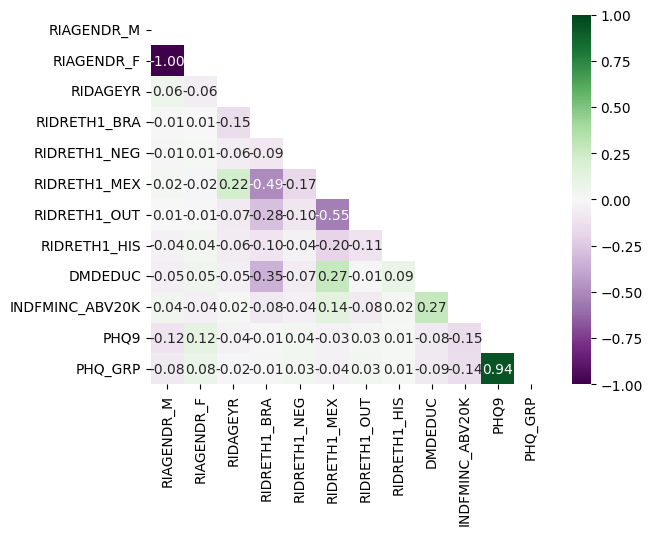

In [4]:
segmented_df = df[demo_cols + phq_score_cols]
sns.heatmap(
    segmented_df.corr(),
    annot=True, fmt='.2f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(segmented_df.corr()))
)

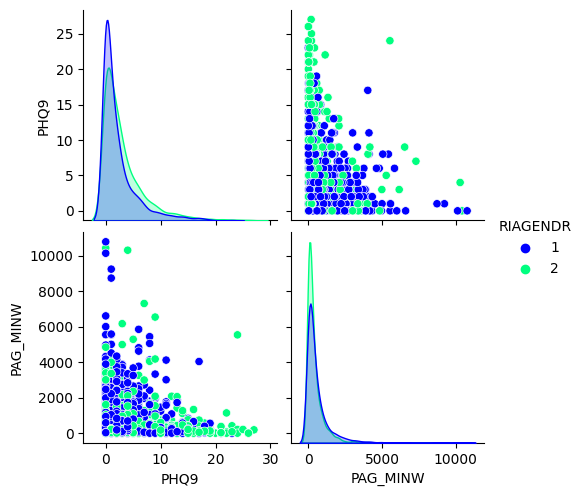

In [5]:
sns.pairplot(
    df,
    hue='RIAGENDR',
    palette='winter',
    vars=['PHQ9','PAG_MINW']
)

<AxesSubplot: xlabel='PAG_MINW', ylabel='PHQ9'>

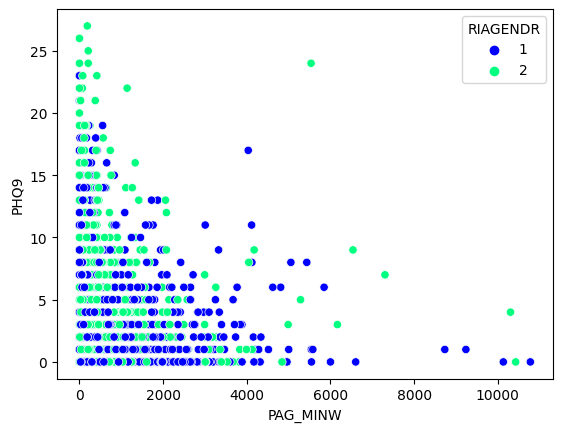

In [6]:
sns.scatterplot(
    data=df,
    y='PHQ9',
    x='PAG_MINW',
    hue='RIAGENDR',
    palette='winter',
)

### Dados Demográficos e Hábitos Saudáveis

<AxesSubplot: >

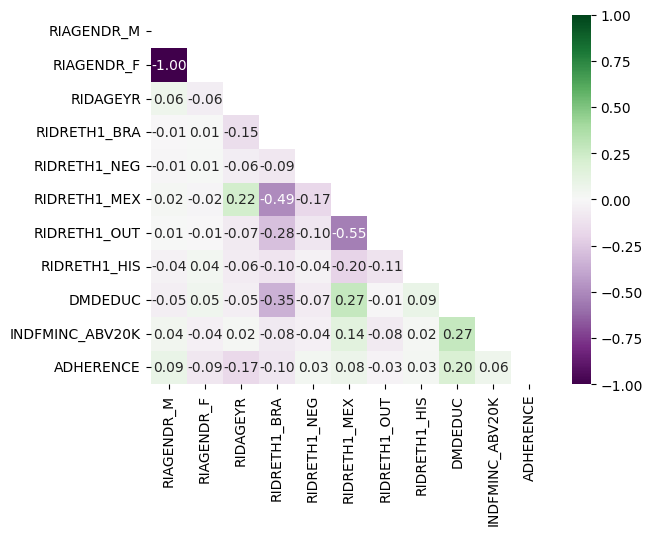

In [7]:
segmented_df = df[demo_cols + ['ADHERENCE']]
sns.heatmap(
    segmented_df.corr(),
    annot=True, fmt='.2f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(segmented_df.corr()))
)

<AxesSubplot: >

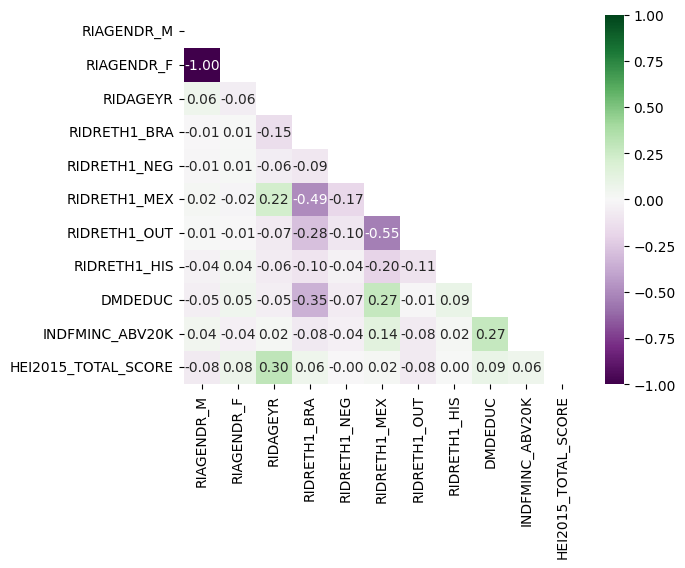

In [8]:
segmented_df = df[demo_cols + ['HEI2015_TOTAL_SCORE']]
sns.heatmap(
    segmented_df.corr(),
    annot=True, fmt='.2f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(segmented_df.corr()))
)

<AxesSubplot: xlabel='HEI2015_TOTAL_SCORE', ylabel='Count'>

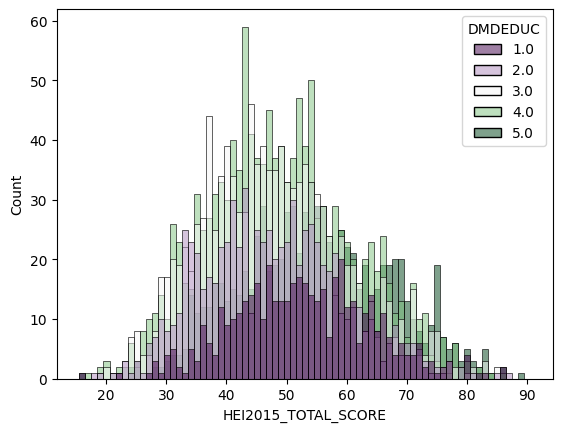

In [9]:
sns.histplot(x=df.HEI2015_TOTAL_SCORE, hue=df.DMDEDUC, discrete=True, palette='PRGn')

### Sintomas de Depressão e Hábitos Saudáveis

<AxesSubplot: >

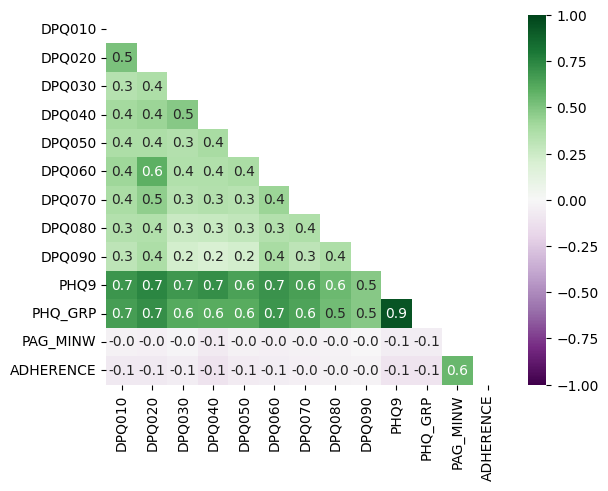

In [10]:
segmented_df = df[phq_cols + phq_score_cols + pag_cols]
sns.heatmap(
    segmented_df.corr(),
    annot=True, fmt='.1f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(segmented_df.corr()))
)

<AxesSubplot: >

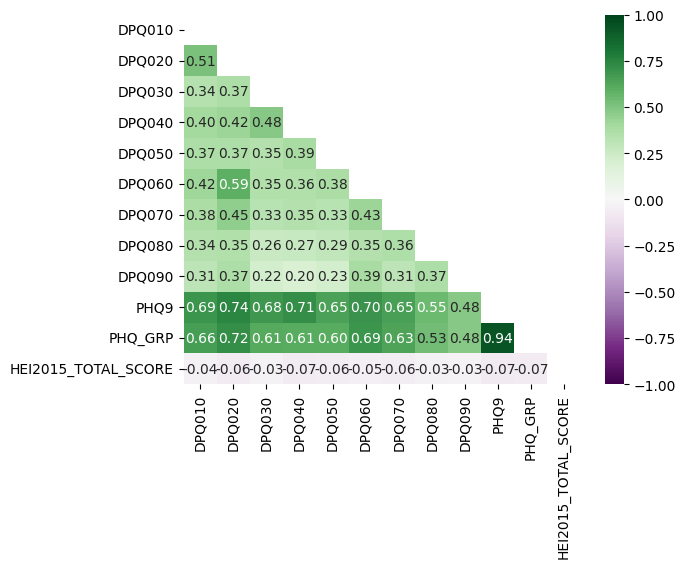

In [12]:
segmented_df = df[phq_cols + phq_score_cols + ['HEI2015_TOTAL_SCORE']]
sns.heatmap(
    segmented_df.corr(),
    annot=True, fmt='.2f',
    cmap='PRGn', vmin=-1, vmax=1,
    mask=np.triu(np.ones_like(segmented_df.corr()))
)